# Model Training

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [140]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [141]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [142]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [143]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [144]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [145]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [146]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [147]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

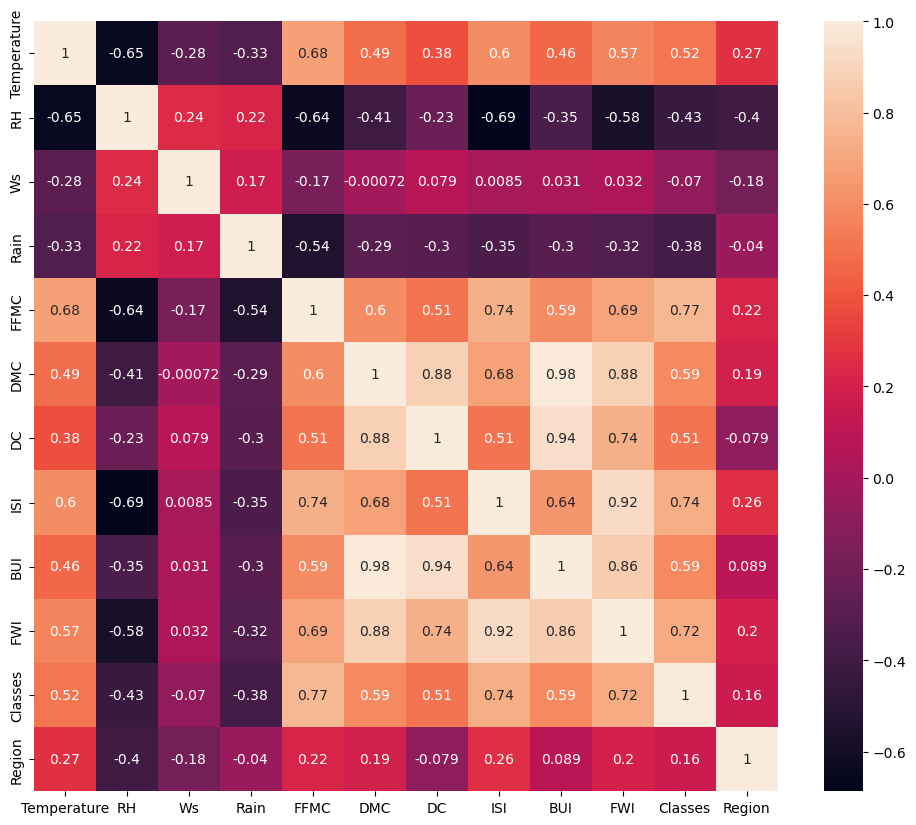

In [148]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

### Feature Selection

In [149]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [150]:
corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [151]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

X_train.shape,X_test.shape

((182, 9), (61, 9))

### Standardized Data

Text(0.5, 0.98, 'Comparing X_train data before and after scaling')

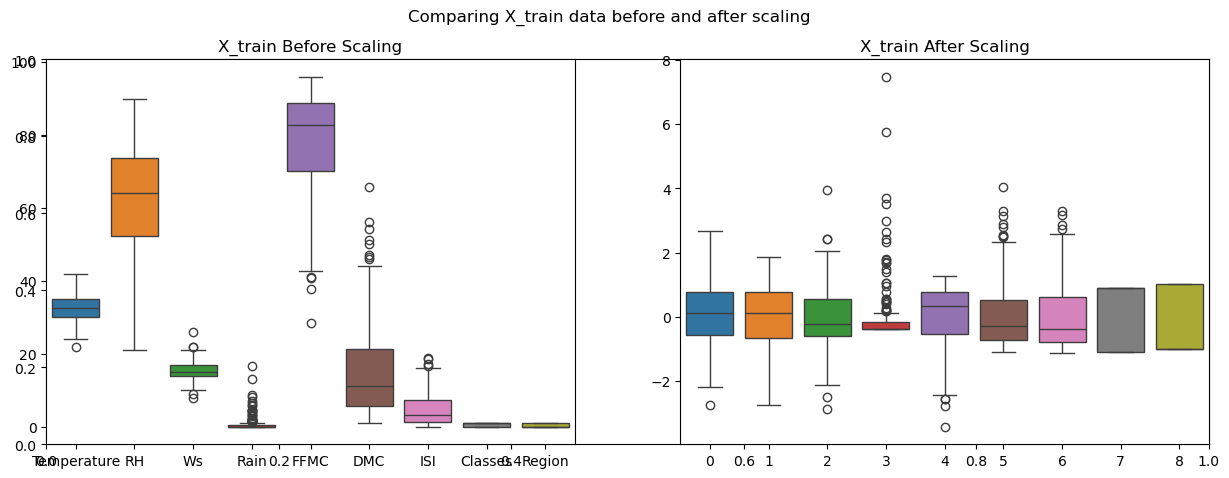

In [152]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')
plt.suptitle("Comparing X_train data before and after scaling")

### Linear Regression

Mean squared error:  0.6742766873791566
Mean absolute error:  0.5468236465249979
R-Squared value:  0.9847657384266952


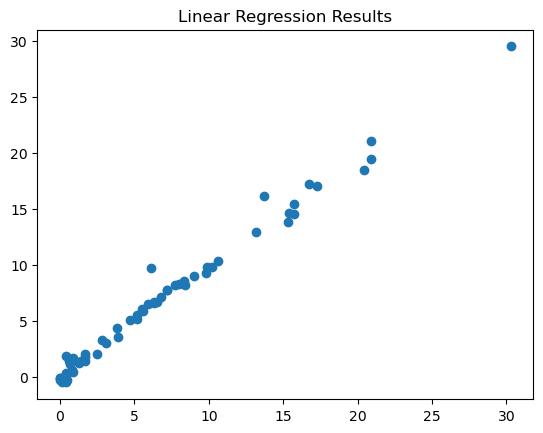

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_scaled,Y_train)
y_pred=regression.predict(X_test_scaled)
plt.scatter(Y_test,y_pred)
plt.title("Linear Regression Results")
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rsquared=r2_score(Y_test,y_pred)
print("Mean squared error: ",mse)
print("Mean absolute error: ",mae)
print("R-Squared value: ",rsquared)

### Lasso Regression

Mean squared error:  2.248345891897475
Mean absolute error:  1.1331759949144087
R-Squared value:  0.9492020263112388


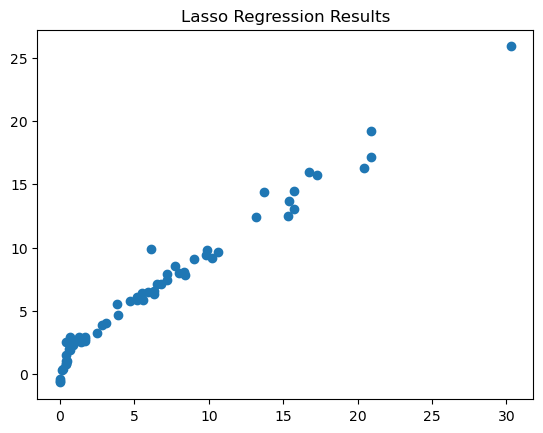

In [154]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,Y_train)
y_pred2=lasso.predict(X_test_scaled)
plt.scatter(Y_test,y_pred2)
plt.title("Lasso Regression Results")
mse=mean_squared_error(Y_test,y_pred2)
mae=mean_absolute_error(Y_test,y_pred2)
rsquared=r2_score(Y_test,y_pred2)
print("Mean squared error: ",mse)
print("Mean absolute error: ",mae)
print("R-Squared value: ",rsquared)

### Ridge Regression

Mean squared error:  0.6949198918152072
Mean absolute error:  0.564230534010569
R-Squared value:  0.9842993364555513


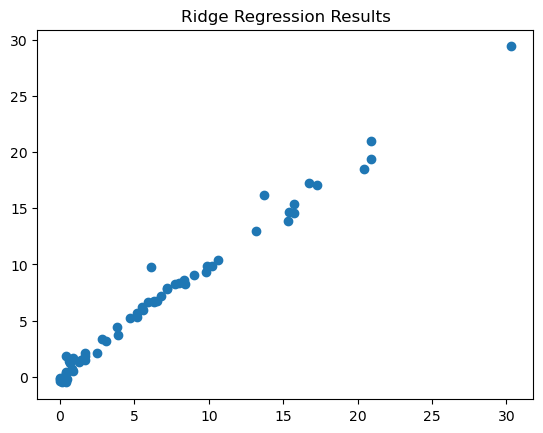

In [155]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,Y_train)
y_pred3=ridge.predict(X_test_scaled)
plt.scatter(Y_test,y_pred3)
plt.title("Ridge Regression Results")
mse=mean_squared_error(Y_test,y_pred3)
mae=mean_absolute_error(Y_test,y_pred3)
rsquared=r2_score(Y_test,y_pred3)
print("Mean squared error: ",mse)
print("Mean absolute error: ",mae)
print("R-Squared value: ",rsquared)

### ElasticNet Regression

Mean squared error:  5.517251101025224
Mean absolute error:  1.8822353634896
R-Squared value:  0.8753460589519703


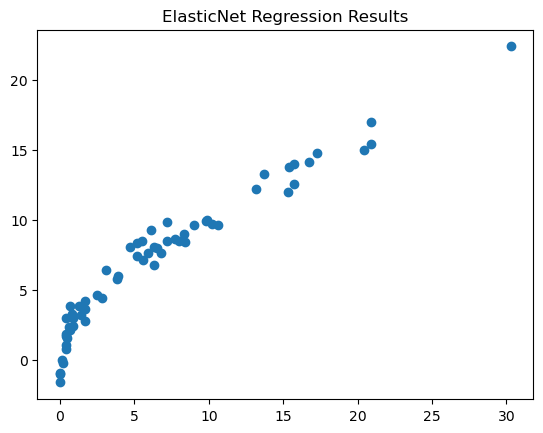

In [156]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticnet=ElasticNet()
elasticnet.fit(X_train_scaled,Y_train)
y_pred4=elasticnet.predict(X_test_scaled)
plt.scatter(Y_test,y_pred4)
plt.title("ElasticNet Regression Results")
mse=mean_squared_error(Y_test,y_pred4)
mae=mean_absolute_error(Y_test,y_pred4)
rsquared=r2_score(Y_test,y_pred4)
print("Mean squared error: ",mse)
print("Mean absolute error: ",mae)
print("R-Squared value: ",rsquared)

# Cross Validations (CV)

### Lasso CV

Mean squared error:  0.7924995554743632
Mean absolute error:  0.6199701158263434
R-Squared value:  0.9820946715928275


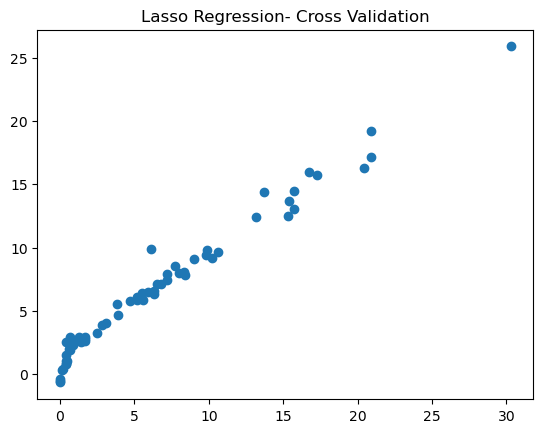

In [157]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassocv=LassoCV()
lassocv.fit(X_train_scaled,Y_train)
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(Y_test,y_pred2)
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rsquared=r2_score(Y_test,y_pred)
plt.title("Lasso Regression- Cross Validation")
print("Mean squared error: ",mse)
print("Mean absolute error: ",mae)
print("R-Squared value: ",rsquared)

### Ridge CV

Mean squared error:  0.6949198918152072
Mean absolute error:  0.564230534010569
R-Squared value:  0.9842993364555513


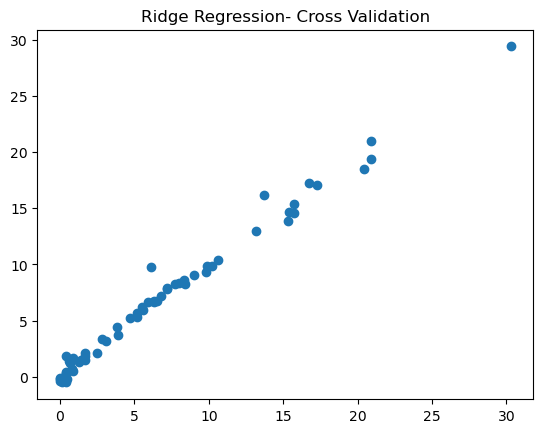

In [158]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,Y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(Y_test,y_pred3)
plt.title("Ridge Regression- Cross Validation")
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rsquared=r2_score(Y_test,y_pred)
print("Mean squared error: ",mse)
print("Mean absolute error: ",mae)
print("R-Squared value: ",rsquared)

### ElasticNet CV

Mean squared error:  0.8222830416276263
Mean absolute error:  0.6575946731430902
R-Squared value:  0.9814217587854941


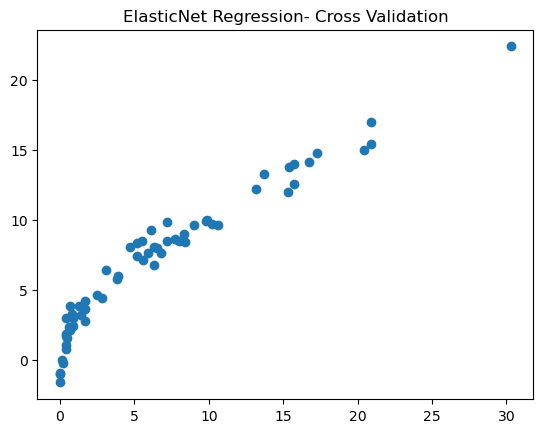

In [159]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Encv=ElasticNetCV(cv=5)
Encv.fit(X_train_scaled,Y_train)
y_pred=Encv.predict(X_test_scaled)
plt.scatter(Y_test,y_pred4)
plt.title("ElasticNet Regression- Cross Validation")
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rsquared=r2_score(Y_test,y_pred)
print("Mean squared error: ",mse)
print("Mean absolute error: ",mae)
print("R-Squared value: ",rsquared)

### Since Ridge Regression shows the highest R-squared (performance metric) value, it is expected to provide the best predictions for new data points.

### Pickle Module

In [160]:
scalar

,copy,True
,with_mean,True
,with_std,True


In [161]:
ridge

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


### Since Rigde Regression shows the highest R-squared value, it will be used for further implementations.

In [162]:
import pickle
pickle.dump(scalar,open('scalar.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))